In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [9]:
x = np.linspace(0,10,20)
y = x
noise = np.random.normal(scale=1, size=x.size)

In [88]:
x2 = np.linspace(10,15,20)
y2 = x2
noise2 = np.random.normal(scale=1, size=x.size)

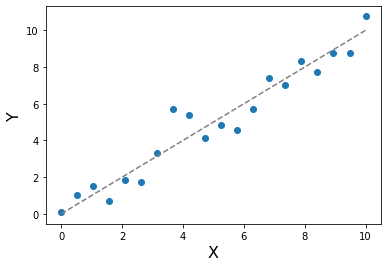

In [67]:
f, ax = plt.subplots(ncols=1)
ax = [ax]
# f.set_size_inches(10,4)
ax[0].scatter(x, y+noise)
fsize=16
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[0].plot(x, y, ls='--', c='gray')
plt.savefig("data.pdf")

In [70]:
fit_deg = [1, 2, 4, 8, 16, 32]
fits = []
mse = []
var = []
for deg in fit_deg:
    z = np.polyfit(x,y+noise,deg=deg)
    print(z)
    p = np.poly1d(z)
    fits.append(p)
    err = np.abs(p(x) - (y + noise))
    mse.append(np.mean(err**2))
    var.append(np.std(err))

[0.97066554 0.11814751]
[0.00613237 0.90934183 0.21497441]
[ 0.0030056  -0.05474527  0.30588032  0.42627759  0.29400614]
[-7.29831372e-05  3.46349195e-03 -6.63297767e-02  6.58475481e-01
 -3.60717164e+00  1.06611858e+01 -1.51925124e+01  8.62484018e+00
 -5.46508975e-02]
[ 3.69074244e-07 -2.98679963e-05  1.10234024e-03 -2.45673466e-02
  3.68968630e-01 -3.94591045e+00  3.09537229e+01 -1.80754756e+02
  7.89027639e+02 -2.56227069e+03  6.10368873e+03 -1.03998522e+04
  1.21608451e+04 -9.10939957e+03  3.84942696e+03 -6.75656095e+02
  7.96326548e-02]
[-1.40521884e-22  3.26935185e-21 -1.98479965e-21 -2.46598171e-19
 -1.51519127e-18  8.64776788e-18  2.21825024e-16  1.46598784e-15
 -5.68527963e-15 -2.03668082e-13 -1.62530472e-12  3.05474942e-12
  1.93518404e-10  1.58648777e-09 -4.92117536e-09 -2.01926355e-07
 -1.01945496e-06  1.39936323e-05  1.73986023e-04 -8.44145370e-04
 -1.88993272e-02  1.09208923e-01  1.47823540e+00 -2.35230695e+01
  1.57653017e+02 -6.47275803e+02  1.77671155e+03 -3.32170884e+0

/home/eweissler/.conda/envs/cqed/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


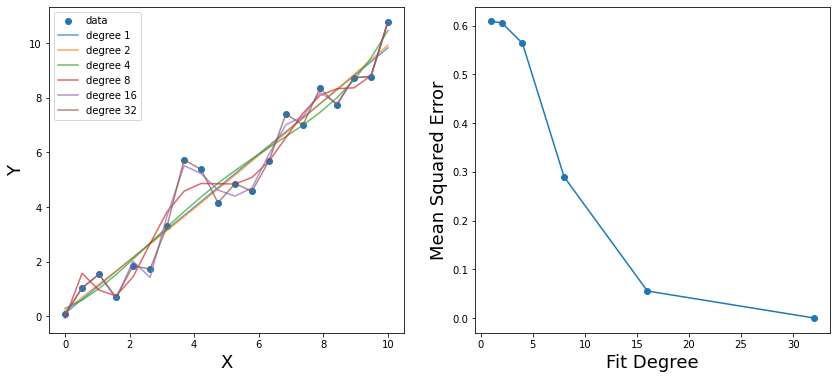

In [74]:
f, ax = plt.subplots(ncols=2)
f.set_size_inches(14,6)
ax[0].scatter(x, y + noise, label="data")
for i in range(len(fit_deg)):
    ax[0].plot(x, fits[i](x), label=f"degree {fit_deg[i]}", alpha=0.7)
ax[0].legend()
fsize=18
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[1].plot(fit_deg, mse, "-o")
ax[1].set_xlabel("Fit Degree", fontsize=fsize)
ax[1].set_ylabel("Mean Squared Error", fontsize=fsize)
# ax[2].plot(fit_deg, var)
plt.savefig("fits.pdf")

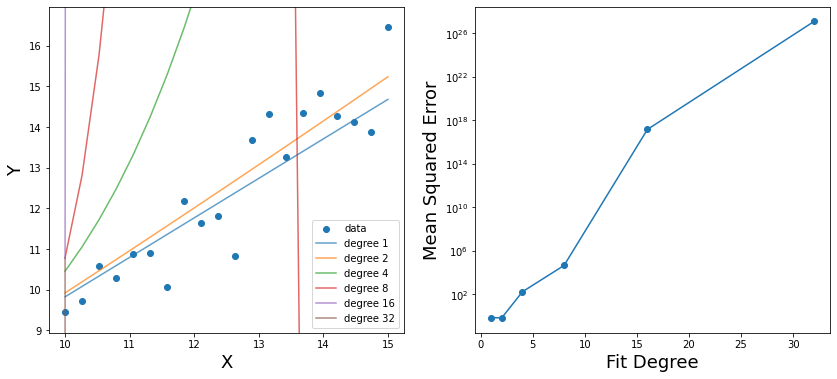

In [89]:
f, ax = plt.subplots(ncols=2)
f.set_size_inches(14,6)
ax[0].scatter(x2, y2 + noise2, label="data")
for i in range(len(fit_deg)):
    ax[0].plot(x2, fits[i](x2), label=f"degree {fit_deg[i]}", alpha=0.7)
ax[0].legend()
fsize=18
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[0].set_ylim(min(y2+noise2)-0.5, max(y2+noise2)+0.5)
mse2 = [np.mean((fits[i](x2) - y2 - noise2)**2) for i in range(len(fit_deg))]
ax[1].plot(fit_deg, mse2, "-o")
ax[1].set_xlabel("Fit Degree", fontsize=fsize)
ax[1].set_ylabel("Mean Squared Error", fontsize=fsize)
ax[1].set_yscale("log")
# ax[2].plot(fit_deg, var)
plt.savefig("fits2.pdf")

In [17]:
z = np.polyfit(x, y, deg=1)

In [22]:
p = np.poly1d(z)